In [1]:
from hyperimpute.plugins.imputers import Imputers, ImputerPlugin
from Impute import fill_with_et
from hyperimpute.plugins.utils.metrics import RMSE

imputers = Imputers()


class EtImputer(ImputerPlugin):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self._model = fill_with_et

    @staticmethod
    def name():
        return "et"

    @staticmethod
    def hyperparameter_space():
        return []

    def _fit(self, *args, **kwargs):
        return self

    def _transform(self, df):
        # 按照缺失值的比例进行排序
        miss_rate = df.isnull().sum() / df.shape[0]
        cols = miss_rate.sort_values().index.tolist()
        cols = [col for col in cols if miss_rate[col] > 0]
        for col in cols:
            df_col_filled = self._model(df, col)
            df[col] = df_col_filled[col]
        return df


imputers.add("et", EtImputer)

hyper = imputers.get("hyperimpute", n_inner_iter=1)
et = imputers.get("et")
missforest = imputers.get("missforest")
gain = imputers.get("gain")
sinkhorn = imputers.get("sinkhorn")
mean = imputers.get("mean")

D:\software\miniconda\Lib\site-packages\pydantic\_internal\_fields.py:149: UserWarning: Field "model_name" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [4]:
import pandas as pd

df = pd.read_csv("./dataset/BMDS_data.csv")
df

,materials,bilayer_materials,ground_state_Stacking,a_mono,a,b,DFT_energy_bi,magnetic_moment,formation_energy,area,d,space_group,no_soc_bandgap,soc_bandgap,dielectric_constant,soc_energy,del_e_bilayer_bottom_and_mono
0,BiMoAs_814,BMDB_BiMoAs-BiMoAs_1,AA,3.321954,3.336951,3.336951,-39.623672,0.0,-0.297236,9.643400,2.701272,P3m1,0.0000,0.0000,133.587840,-0.612305,0.112123
1,BiTaAs_815,BMDB_BiTaAs-BiTaAs_2,AA,3.493583,3.438187,3.438187,-42.397422,0.0,-0.333881,10.237285,2.680038,P3m1,0.0000,0.0000,34.725118,-1.040611,0.110058
2,AsClTe_820,BMDB_ClAsTe-ClAsTe_3,AA,3.934365,3.924260,3.924260,-22.106501,0.0,-0.156248,13.336804,3.232067,P3m1,0.4441,0.2889,7.557986,-0.078199,-0.028724
3,NbAsSb_825,BMDB_SbNbAs-SbNbAs_4,AA,3.401773,3.361659,3.361659,-40.392551,0.0,-0.332292,9.786863,2.435314,P3m1,0.0000,0.0000,60.535916,-0.115801,0.105072
4,BiClS_834,BMDB_ClBiS-ClBiS_5,AB1,4.066563,4.052372,4.052372,-24.352339,0.0,-0.135522,14.179504,2.913275,P3m1,1.6105,1.0477,4.177573,-0.403225,-0.007675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,C2_3176,BMDB_C2-C2_756,AB,2.468276,2.467186,2.467186,-37.124373,0.0,-0.059683,5.271681,3.493450,P-3m1,0.0000,0.0762,109.014674,-0.000015,-0.000421
756,Ge2_132,BMDB_Ge2-Ge2_757,AA,4.042847,4.024250,4.024250,-17.024606,0.0,-0.217768,14.024847,1.870524,P-3m1,0.0000,0.0000,9.745150,-0.018109,-0.003826
757,P2_1012,BMDB_P2-P2_758,AA,3.276642,3.269251,3.269251,-21.859284,0.0,-0.102141,9.256140,3.420515,P-3m1,1.2669,1.2667,3.748797,-0.000827,-0.001281
758,Sb2_2159,BMDB_Sb2-Sb2_759,AA,4.119721,4.134183,4.134183,-16.850371,0.0,-0.160182,14.801549,3.177799,P-3m1,0.5061,0.4302,8.097981,-0.133777,0.000316


In [5]:
df = df.select_dtypes(include=["float64", "int64"])
df

,a_mono,a,b,DFT_energy_bi,magnetic_moment,formation_energy,area,d,no_soc_bandgap,soc_bandgap,dielectric_constant,soc_energy,del_e_bilayer_bottom_and_mono
0,3.321954,3.336951,3.336951,-39.623672,0.0,-0.297236,9.643400,2.701272,0.0000,0.0000,133.587840,-0.612305,0.112123
1,3.493583,3.438187,3.438187,-42.397422,0.0,-0.333881,10.237285,2.680038,0.0000,0.0000,34.725118,-1.040611,0.110058
2,3.934365,3.924260,3.924260,-22.106501,0.0,-0.156248,13.336804,3.232067,0.4441,0.2889,7.557986,-0.078199,-0.028724
3,3.401773,3.361659,3.361659,-40.392551,0.0,-0.332292,9.786863,2.435314,0.0000,0.0000,60.535916,-0.115801,0.105072
4,4.066563,4.052372,4.052372,-24.352339,0.0,-0.135522,14.179504,2.913275,1.6105,1.0477,4.177573,-0.403225,-0.007675
...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,2.468276,2.467186,2.467186,-37.124373,0.0,-0.059683,5.271681,3.493450,0.0000,0.0762,109.014674,-0.000015,-0.000421
756,4.042847,4.024250,4.024250,-17.024606,0.0,-0.217768,14.024847,1.870524,0.0000,0.0000,9.745150,-0.018109,-0.003826
757,3.276642,3.269251,3.269251,-21.859284,0.0,-0.102141,9.256140,3.420515,1.2669,1.2667,3.748797,-0.000827,-0.001281
758,4.119721,4.134183,4.134183,-16.850371,0.0,-0.160182,14.801549,3.177799,0.5061,0.4302,8.097981,-0.133777,0.000316


In [6]:
df.drop(labels=["soc_bandgap"], axis=1, inplace=True)
df

,a_mono,a,b,DFT_energy_bi,magnetic_moment,formation_energy,area,d,no_soc_bandgap,dielectric_constant,soc_energy,del_e_bilayer_bottom_and_mono
0,3.321954,3.336951,3.336951,-39.623672,0.0,-0.297236,9.643400,2.701272,0.0000,133.587840,-0.612305,0.112123
1,3.493583,3.438187,3.438187,-42.397422,0.0,-0.333881,10.237285,2.680038,0.0000,34.725118,-1.040611,0.110058
2,3.934365,3.924260,3.924260,-22.106501,0.0,-0.156248,13.336804,3.232067,0.4441,7.557986,-0.078199,-0.028724
3,3.401773,3.361659,3.361659,-40.392551,0.0,-0.332292,9.786863,2.435314,0.0000,60.535916,-0.115801,0.105072
4,4.066563,4.052372,4.052372,-24.352339,0.0,-0.135522,14.179504,2.913275,1.6105,4.177573,-0.403225,-0.007675
...,...,...,...,...,...,...,...,...,...,...,...,...
755,2.468276,2.467186,2.467186,-37.124373,0.0,-0.059683,5.271681,3.493450,0.0000,109.014674,-0.000015,-0.000421
756,4.042847,4.024250,4.024250,-17.024606,0.0,-0.217768,14.024847,1.870524,0.0000,9.745150,-0.018109,-0.003826
757,3.276642,3.269251,3.269251,-21.859284,0.0,-0.102141,9.256140,3.420515,1.2669,3.748797,-0.000827,-0.001281
758,4.119721,4.134183,4.134183,-16.850371,0.0,-0.160182,14.801549,3.177799,0.5061,8.097981,-0.133777,0.000316


In [7]:
from hyperimpute.plugins.utils.simulate import simulate_nan
import numpy as np

np.random.seed(42)
X = df
# reindex
cols = X.columns.tolist()
X = np.array(X)

sim_df = simulate_nan(X, 0.1, mecha="MAR")
X = pd.DataFrame(X, columns=cols)
X_with_nan = sim_df["X_incomp"]
mask = sim_df["mask"]
X_with_nan = pd.DataFrame(X_with_nan, columns=cols)
X_with_nan

,a_mono,a,b,DFT_energy_bi,magnetic_moment,formation_energy,area,d,no_soc_bandgap,dielectric_constant,soc_energy,del_e_bilayer_bottom_and_mono
0,3.321954,3.336951,3.336951,-39.623672,0.0,-0.297236,9.643400,2.701272,0.0000,133.587840,-0.612305,NaN
1,3.493583,3.438187,3.438187,-42.397422,0.0,-0.333881,10.237285,2.680038,0.0000,34.725118,-1.040611,0.110058
2,3.934365,3.924260,3.924260,-22.106501,0.0,-0.156248,13.336804,3.232067,0.4441,7.557986,-0.078199,-0.028724
3,3.401773,3.361659,3.361659,-40.392551,0.0,-0.332292,9.786863,2.435314,0.0000,60.535916,-0.115801,0.105072
4,4.066563,NaN,4.052372,-24.352339,0.0,-0.135522,14.179504,NaN,1.6105,4.177573,-0.403225,-0.007675
...,...,...,...,...,...,...,...,...,...,...,...,...
755,2.468276,2.467186,2.467186,-37.124373,0.0,-0.059683,5.271681,3.493450,0.0000,109.014674,-0.000015,NaN
756,4.042847,4.024250,4.024250,-17.024606,0.0,-0.217768,14.024847,1.870524,0.0000,9.745150,-0.018109,-0.003826
757,3.276642,NaN,3.269251,-21.859284,0.0,-0.102141,9.256140,3.420515,1.2669,3.748797,-0.000827,-0.001281
758,4.119721,4.134183,4.134183,-16.850371,0.0,-0.160182,14.801549,3.177799,0.5061,8.097981,-0.133777,0.000316


In [8]:
X_filled_et = et.fit_transform(X_with_nan.copy())
print("RMSE: ", RMSE(X.values, X_filled_et.values, mask))

X_filled_et

RMSE:  2.455832212255402


,a_mono,a,b,DFT_energy_bi,magnetic_moment,formation_energy,area,d,no_soc_bandgap,dielectric_constant,soc_energy,del_e_bilayer_bottom_and_mono
0,3.321954,3.336951,3.336951,-39.623672,0.0,-0.297236,9.643400,2.701272,0.0000,133.587840,-0.612305,0.025359
1,3.493583,3.438187,3.438187,-42.397422,0.0,-0.333881,10.237285,2.680038,0.0000,34.725118,-1.040611,0.110058
2,3.934365,3.924260,3.924260,-22.106501,0.0,-0.156248,13.336804,3.232067,0.4441,7.557986,-0.078199,-0.028724
3,3.401773,3.361659,3.361659,-40.392551,0.0,-0.332292,9.786863,2.435314,0.0000,60.535916,-0.115801,0.105072
4,4.066563,4.050624,4.052372,-24.352339,0.0,-0.135522,14.179504,2.883329,1.6105,4.177573,-0.403225,-0.007675
...,...,...,...,...,...,...,...,...,...,...,...,...
755,2.468276,2.467186,2.467186,-37.124373,0.0,-0.059683,5.271681,3.493450,0.0000,109.014674,-0.000015,0.000127
756,4.042847,4.024250,4.024250,-17.024606,0.0,-0.217768,14.024847,1.870524,0.0000,9.745150,-0.018109,-0.003826
757,3.276642,3.262118,3.269251,-21.859284,0.0,-0.102141,9.256140,3.420515,1.2669,3.748797,-0.000827,-0.001281
758,4.119721,4.134183,4.134183,-16.850371,0.0,-0.160182,14.801549,3.177799,0.5061,8.097981,-0.133777,0.000316


In [9]:
X_filled_hyper = hyper.fit_transform(X_with_nan.copy())
print("RMSE: ", RMSE(X.values, X_filled_hyper.values, mask))

X_filled_hyper

RMSE:  2.515374787284186


,a_mono,a,b,DFT_energy_bi,magnetic_moment,formation_energy,area,d,no_soc_bandgap,dielectric_constant,soc_energy,del_e_bilayer_bottom_and_mono
0,3.321954,3.336951,3.336951,-39.623672,0.0,-0.297236,9.643400,2.701272,0.0000,133.587840,-0.612305,0.081401
1,3.493583,3.438187,3.438187,-42.397422,0.0,-0.333881,10.237285,2.680038,0.0000,34.725118,-1.040611,0.110058
2,3.934365,3.924260,3.924260,-22.106501,0.0,-0.156248,13.336804,3.232067,0.4441,7.557986,-0.078199,-0.028724
3,3.401773,3.361659,3.361659,-40.392551,0.0,-0.332292,9.786863,2.435314,0.0000,60.535916,-0.115801,0.105072
4,4.066563,4.053915,4.052372,-24.352339,0.0,-0.135522,14.179504,2.875881,1.6105,4.177573,-0.403225,-0.007675
...,...,...,...,...,...,...,...,...,...,...,...,...
755,2.468276,2.467186,2.467186,-37.124373,0.0,-0.059683,5.271681,3.493450,0.0000,109.014674,-0.000015,-0.001957
756,4.042847,4.024250,4.024250,-17.024606,0.0,-0.217768,14.024847,1.870524,0.0000,9.745150,-0.018109,-0.003826
757,3.276642,3.267697,3.269251,-21.859284,0.0,-0.102141,9.256140,3.420515,1.2669,3.748797,-0.000827,-0.001281
758,4.119721,4.134183,4.134183,-16.850371,0.0,-0.160182,14.801549,3.177799,0.5061,8.097981,-0.133777,0.000316


In [10]:
X_filled_missforest = missforest.fit_transform(X_with_nan.copy())
print("RMSE: ", RMSE(X.values, X_filled_missforest.values, mask))

X_filled_missforest

RMSE:  3.4468672895577708


,a_mono,a,b,DFT_energy_bi,magnetic_moment,formation_energy,area,d,no_soc_bandgap,dielectric_constant,soc_energy,del_e_bilayer_bottom_and_mono
0,3.321954,3.336951,3.336951,-39.623672,0.0,-0.297236,9.643400,2.701272,0.0000,133.587840,-0.612305,0.012650
1,3.493583,3.438187,3.438187,-42.397422,0.0,-0.333881,10.237285,2.680038,0.0000,34.725118,-1.040611,0.110058
2,3.934365,3.924260,3.924260,-22.106501,0.0,-0.156248,13.336804,3.232067,0.4441,7.557986,-0.078199,-0.028724
3,3.401773,3.361659,3.361659,-40.392551,0.0,-0.332292,9.786863,2.435314,0.0000,60.535916,-0.115801,0.105072
4,4.066563,4.056790,4.052372,-24.352339,0.0,-0.135522,14.179504,3.023568,1.6105,4.177573,-0.403225,-0.007675
...,...,...,...,...,...,...,...,...,...,...,...,...
755,2.468276,2.467186,2.467186,-37.124373,0.0,-0.059683,5.271681,3.493450,0.0000,109.014674,-0.000015,0.005459
756,4.042847,4.024250,4.024250,-17.024606,0.0,-0.217768,14.024847,1.870524,0.0000,9.745150,-0.018109,-0.003826
757,3.276642,3.332257,3.269251,-21.859284,0.0,-0.102141,9.256140,3.420515,1.2669,3.748797,-0.000827,-0.001281
758,4.119721,4.134183,4.134183,-16.850371,0.0,-0.160182,14.801549,3.177799,0.5061,8.097981,-0.133777,0.000316


In [11]:
X_filled_gain = gain.fit_transform(X_with_nan.copy())
print("RMSE: ", RMSE(X.values, X_filled_gain.values, mask))

X_filled_gain

RMSE:  4.724457462056916


,0,1,2,3,4,5,6,7,8,9,10,11
0,3.321954,3.336951,3.336951,-39.623672,0.0,-0.297236,9.643400,2.701272,0.0000,133.587840,-0.612305,0.064556
1,3.493583,3.438187,3.438187,-42.397422,0.0,-0.333881,10.237285,2.680038,0.0000,34.725118,-1.040611,0.110058
2,3.934365,3.924260,3.924260,-22.106501,0.0,-0.156248,13.336804,3.232067,0.4441,7.557986,-0.078199,-0.028724
3,3.401773,3.361659,3.361659,-40.392551,0.0,-0.332292,9.786863,2.435314,0.0000,60.535916,-0.115801,0.105072
4,4.066563,4.092733,4.052372,-24.352339,0.0,-0.135522,14.179504,2.987849,1.6105,4.177573,-0.403225,-0.007675
...,...,...,...,...,...,...,...,...,...,...,...,...
755,2.468276,2.467186,2.467186,-37.124373,0.0,-0.059683,5.271681,3.493450,0.0000,109.014674,-0.000015,0.086377
756,4.042847,4.024250,4.024250,-17.024606,0.0,-0.217768,14.024847,1.870524,0.0000,9.745150,-0.018109,-0.003826
757,3.276642,3.801665,3.269251,-21.859284,0.0,-0.102141,9.256140,3.420515,1.2669,3.748797,-0.000827,-0.001281
758,4.119721,4.134183,4.134183,-16.850371,0.0,-0.160182,14.801549,3.177799,0.5061,8.097981,-0.133777,0.000316


In [12]:
# set  X_filled_gain cols
X_filled_gain.columns = X.columns
X_filled_gain

,a_mono,a,b,DFT_energy_bi,magnetic_moment,formation_energy,area,d,no_soc_bandgap,dielectric_constant,soc_energy,del_e_bilayer_bottom_and_mono
0,3.321954,3.336951,3.336951,-39.623672,0.0,-0.297236,9.643400,2.701272,0.0000,133.587840,-0.612305,0.064556
1,3.493583,3.438187,3.438187,-42.397422,0.0,-0.333881,10.237285,2.680038,0.0000,34.725118,-1.040611,0.110058
2,3.934365,3.924260,3.924260,-22.106501,0.0,-0.156248,13.336804,3.232067,0.4441,7.557986,-0.078199,-0.028724
3,3.401773,3.361659,3.361659,-40.392551,0.0,-0.332292,9.786863,2.435314,0.0000,60.535916,-0.115801,0.105072
4,4.066563,4.092733,4.052372,-24.352339,0.0,-0.135522,14.179504,2.987849,1.6105,4.177573,-0.403225,-0.007675
...,...,...,...,...,...,...,...,...,...,...,...,...
755,2.468276,2.467186,2.467186,-37.124373,0.0,-0.059683,5.271681,3.493450,0.0000,109.014674,-0.000015,0.086377
756,4.042847,4.024250,4.024250,-17.024606,0.0,-0.217768,14.024847,1.870524,0.0000,9.745150,-0.018109,-0.003826
757,3.276642,3.801665,3.269251,-21.859284,0.0,-0.102141,9.256140,3.420515,1.2669,3.748797,-0.000827,-0.001281
758,4.119721,4.134183,4.134183,-16.850371,0.0,-0.160182,14.801549,3.177799,0.5061,8.097981,-0.133777,0.000316


In [13]:
X_filled_sinkhorn = sinkhorn.fit_transform(X_with_nan.copy())

print("RMSE: ", RMSE(X.values, X_filled_sinkhorn.values, mask))


RMSE:  4.826594652329234


In [14]:
X_filled_sinkhorn.columns = X.columns

X_filled_sinkhorn

,a_mono,a,b,DFT_energy_bi,magnetic_moment,formation_energy,area,d,no_soc_bandgap,dielectric_constant,soc_energy,del_e_bilayer_bottom_and_mono
0,3.321954,3.336951,3.336951,-39.623672,0.0,-0.297236,9.643400,2.701272,0.0000,133.587840,-0.612305,0.002686
1,3.493583,3.438187,3.438187,-42.397422,0.0,-0.333881,10.237285,2.680038,0.0000,34.725118,-1.040611,0.110058
2,3.934365,3.924260,3.924260,-22.106501,0.0,-0.156248,13.336804,3.232067,0.4441,7.557986,-0.078199,-0.028724
3,3.401773,3.361659,3.361659,-40.392551,0.0,-0.332292,9.786863,2.435314,0.0000,60.535916,-0.115801,0.105072
4,4.066563,3.982952,4.052372,-24.352339,0.0,-0.135522,14.179504,2.852304,1.6105,4.177573,-0.403225,-0.007675
...,...,...,...,...,...,...,...,...,...,...,...,...
755,2.468276,2.467186,2.467186,-37.124373,0.0,-0.059683,5.271681,3.493450,0.0000,109.014674,-0.000015,0.011555
756,4.042847,4.024250,4.024250,-17.024606,0.0,-0.217768,14.024847,1.870524,0.0000,9.745150,-0.018109,-0.003826
757,3.276642,3.273888,3.269251,-21.859284,0.0,-0.102141,9.256140,3.420515,1.2669,3.748797,-0.000827,-0.001281
758,4.119721,4.134183,4.134183,-16.850371,0.0,-0.160182,14.801549,3.177799,0.5061,8.097981,-0.133777,0.000316


In [15]:
X_filled_mean = mean.fit_transform(X_with_nan.copy())

print("RMSE: ", RMSE(X.values, X_filled_mean.values, mask))

X_filled_mean.columns = X.columns
X_filled_mean

RMSE:  4.94617153588792


,a_mono,a,b,DFT_energy_bi,magnetic_moment,formation_energy,area,d,no_soc_bandgap,dielectric_constant,soc_energy,del_e_bilayer_bottom_and_mono
0,3.321954,3.336951,3.336951,-39.623672,0.0,-0.297236,9.643400,2.701272,0.0000,133.587840,-0.612305,-0.005358
1,3.493583,3.438187,3.438187,-42.397422,0.0,-0.333881,10.237285,2.680038,0.0000,34.725118,-1.040611,0.110058
2,3.934365,3.924260,3.924260,-22.106501,0.0,-0.156248,13.336804,3.232067,0.4441,7.557986,-0.078199,-0.028724
3,3.401773,3.361659,3.361659,-40.392551,0.0,-0.332292,9.786863,2.435314,0.0000,60.535916,-0.115801,0.105072
4,4.066563,3.714900,4.052372,-24.352339,0.0,-0.135522,14.179504,2.987390,1.6105,4.177573,-0.403225,-0.007675
...,...,...,...,...,...,...,...,...,...,...,...,...
755,2.468276,2.467186,2.467186,-37.124373,0.0,-0.059683,5.271681,3.493450,0.0000,109.014674,-0.000015,-0.005358
756,4.042847,4.024250,4.024250,-17.024606,0.0,-0.217768,14.024847,1.870524,0.0000,9.745150,-0.018109,-0.003826
757,3.276642,3.714900,3.269251,-21.859284,0.0,-0.102141,9.256140,3.420515,1.2669,3.748797,-0.000827,-0.001281
758,4.119721,4.134183,4.134183,-16.850371,0.0,-0.160182,14.801549,3.177799,0.5061,8.097981,-0.133777,0.000316


In [16]:
missing_columns = X_with_nan.columns[X_with_nan.isnull().any()].tolist()
missing_columns

['a',
 'DFT_energy_bi',
 'magnetic_moment',
 'area',
 'd',
 'del_e_bilayer_bottom_and_mono']

In [17]:
col = missing_columns[0]
col_mean = X[col].mean()
col_std = X[col].std()
# 统计在填充前缺失值在一个std距离内的缺失值
col_missing_index = X_with_nan[X_with_nan[col].isnull()].index
col_missing_values = X_with_nan.loc[col_missing_index, col]
original_values = X.loc[col_missing_index, col]
original_values

4      4.052372
46     3.321433
49     3.572494
50     3.920177
74     3.807412
         ...   
737    3.492846
740    4.422851
754    3.610495
757    3.269251
759    3.768150
Name: a, Length: 74, dtype: float64

et: a score_std: 0.07023873256568255, score_2std: 0.042899914290596225, score_3std: 0.03262368853362418
hyper: a score_std: 0.12784526949029748, score_2std: 0.07364124903770272, score_3std: 0.12220791452270063
missforest: a score_std: 0.14588628595007147, score_2std: 0.4652220293399609, score_3std: 1.3252218971434988
gain: a score_std: 0.6051779672245673, score_2std: 0.7298379490038354, score_3std: 2.7528761767990373
sinkhorn: a score_std: 0.2901899922935226, score_2std: 0.45810914939404773, score_3std: 1.5016268519168983
mean: a score_std: 0.5790442237388111, score_2std: 1.4778099785486132, score_3std: 4.697361658217146
et: DFT_energy_bi score_std: 0.26935672359749363, score_2std: 0.7508513357235671, score_3std: 1.1251247520435796
hyper: DFT_energy_bi score_std: 0.35168960852118464, score_2std: 0.675517648398994, score_3std: 1.3452744954190339
missforest: DFT_energy_bi score_std: 0.4641593487705882, score_2std: 0.9173978252337374, score_3std: 1.872995363540477
gain: DFT_energy_bi scor

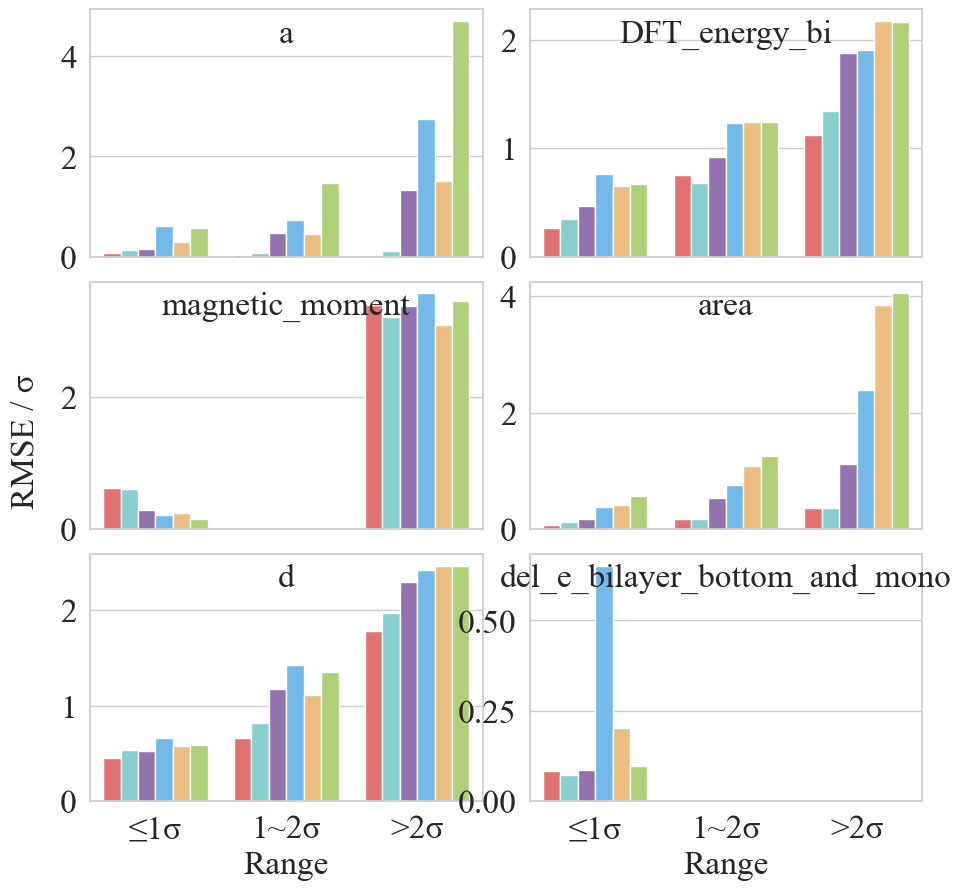

In [18]:
from scipy.stats import skew, kurtosis
import numpy as np
from sklearn.metrics import root_mean_squared_error as rmse
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
my_palette = sns.color_palette(["#F35F5F", "#7ED9D9", "#9467BD", "#5FBDFF", "#FDBF6F", "#B3DE69", "#FFC0D9"])

cols = 2
rows = len(missing_columns) // cols if len(missing_columns) % cols == 0 else len(missing_columns) // cols + 1
fig, axs = plt.subplots(rows, cols, figsize=(5 * cols, 3 * rows), sharex=True)
axs = axs.flatten()

all_df = pd.DataFrame(columns=["RMSE", "Method", "Range", "Col"])

for col in missing_columns:
    ax = axs[missing_columns.index(col)]
    df = pd.DataFrame(columns=["RMSE", "Method", "Range"])

    col_mean = X[col].mean()
    col_std = X[col].std()
    # 统计在填充前缺失值在一个std距离内的缺失值
    col_missing_index = X_with_nan[X_with_nan[col].isnull()].index
    col_missing_values = X_with_nan.loc[col_missing_index, col]
    original_values = X.loc[col_missing_index, col]
    count = {"1": [], "2": [], "3": []}
    for idx, val in zip(col_missing_index, original_values):
        if abs(val - col_mean) > 2 * col_std:
            count["3"].append(idx)
        elif abs(val - col_mean) > 1 * col_std:
            count["2"].append(idx)
        else:
            count["1"].append(idx)
    col_mean = abs(col_mean)
    score_std = rmse(original_values[count["1"]], X_filled_et.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_et.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_et.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"et: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["MatImpute", "MatImpute", "MatImpute"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    score_std = rmse(original_values[count["1"]], X_filled_hyper.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_hyper.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_hyper.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"hyper: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["HyperImpute", "HyperImpute", "HyperImpute"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    score_std = rmse(original_values[count["1"]], X_filled_missforest.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_missforest.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_missforest.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"missforest: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["MissForest", "MissForest", "MissForest"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    score_std = rmse(original_values[count["1"]], X_filled_gain.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_gain.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_gain.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"gain: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["Gain", "Gain", "Gain"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    score_std = rmse(original_values[count["1"]], X_filled_sinkhorn.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_sinkhorn.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_sinkhorn.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"sinkhorn: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["Sinkhorn", "Sinkhorn", "Sinkhorn"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    # mean
    score_std = rmse(original_values[count["1"]], X_filled_mean.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_mean.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_mean.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"mean: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["Mean", "Mean", "Mean"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)
    df["Col"] = [col] * df.shape[0]
    all_df = pd.concat([all_df, df], ignore_index=True)

    df.drop(columns=["Col"], inplace=True)

    sns.barplot(x="Range", y="RMSE", hue="Method", data=df, ax=ax, palette=my_palette)
    # del legend
    ax.get_legend().remove()
    # del y label
    ax.set_ylabel("")
    ax.xaxis.set_tick_params(labelsize=24)
    ax.yaxis.set_tick_params(labelsize=24)
    # set x label size
    ax.set_xlabel("Range", fontsize=24)
    # 把标题添加到图的框内
    ax.text(0.5, 0.9, col, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,
            fontsize=24)

# get legend
handles, labels = ax.get_legend_handles_labels()

# del empty subplot
for i in range(len(missing_columns), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
fig.text(0.02, 0.5, 'RMSE / σ', va='center', rotation='vertical', fontsize=24)
fig.subplots_adjust(hspace=0.1, wspace=0.12, left=0.1, bottom=0.1)
# plt.savefig("std-rmse.png", dpi=300)
all_df.to_excel("std-rmse-BMDS.xlsx", index=False)